
# Recommendation System:
A recommendation system is a type of information filtering system that attempts to forecast how a user would rate or prefer an item. In layman's terms, it's an algorithm that proposes goods to people that are relevant to them. For example, on Netflix, which movie to watch, on e-commerce, which product to buy, on Kindle, which book to read, and so on.



## The MovieLens DataSet
- 100,000 ratings (1-5) from 943 users on 1682 movies.



- Lets load the two most importance files to get a sense of the data. 
- First of all import all the necessary libaray:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading users file:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
users= pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
# Checking shape of users files and head 
print(users.shape)
users.head()

(100003, 4)


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


This reconfirms that there are 100003 users and we have 4 features.This confirms that there are 100K ratings for different user and movie combinations. Also notice that each rating has a timestamp associated with it.

In [4]:
# Reading the movie data
movies= pd.read_csv('Movie_Id_Titles')

In [5]:
# Checking shape of movie data and look first 5 rows
print(movies.shape)
movies.head()

(1682, 2)


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


This dataset contains attributes of the 1682 movies. There are 2 columns item_id and title


### Now we have to merge these two data frame on same columns "item_id" 
- Here we are going to merge the data and stored in data frame called df
- We will use pd.merge to merge these data frame 

 Merge the 2 CSV files


In [6]:
# Combining the data on same column
df= pd.merge(users, movies, on= 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

In [7]:
# lets see the average rating for all these movies
df.groupby('title').agg({'rating':'mean'}).sort_values(by='rating', ascending=False).head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [8]:
# Lets see the count of each rating given by users
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
df.shape

(100003, 5)

### Let's create a ratings dataframe with average rating and number of ratings:

In [10]:
ratings= pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [11]:
ratings['rating_counts']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [12]:
ratings.shape

(1664, 2)

In [13]:
 ratings[ratings['rating_counts']<100]

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


By looking at above table we could conclude that no of rating of some of movies are given very less. If one person has watched that movies and given rating '5', so, that would not count it. therefore, we are going to take atlest 100 no of rating counts given by users. if particular movie is watched and given rating by more than 100 users, then only we would considerd it.

Text(0, 0.5, 'count of rating')

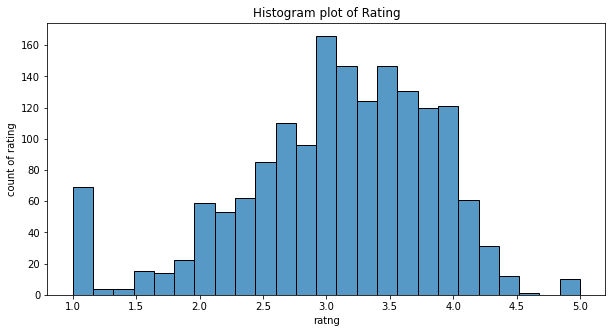

In [14]:
# Lets look at the rating 
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating'])
plt.title("Histogram plot of Rating")
plt.xlabel('ratng')
plt.ylabel('count of rating')

By looking at graph we say that there are some outliers, but the graph is roughly follows the normal distribution curve. And most of user has given rating of movies betwwen 3 to 4.

Text(0, 0.5, 'count of rating')

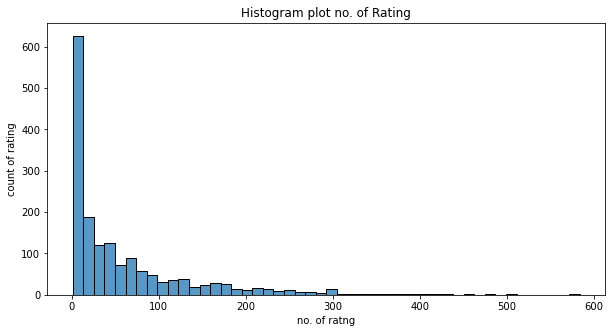

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(ratings['rating_counts'])
plt.title("Histogram plot no. of Rating")
plt.xlabel('no. of ratng')
plt.ylabel('count of rating')

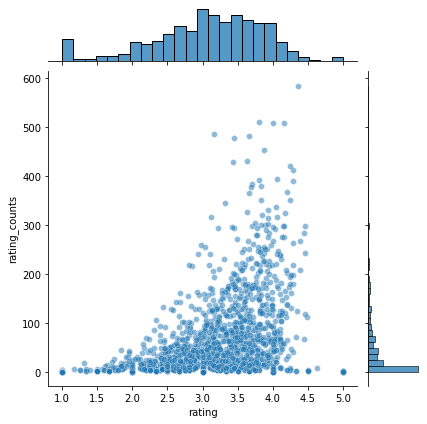

In [16]:

sns.jointplot(x='rating',y='rating_counts',data=ratings,alpha=0.5)

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [17]:
movies_reco= df.pivot_table(index='user_id', columns='title',values='rating')
movies_reco.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
movies_reco.shape

(944, 1664)

In [19]:
starwars_user_ratings = movies_reco['Star Wars (1977)']
liarliar_user_ratings = movies_reco['Liar Liar (1997)']

## We can then use corrwith() method to get correlations between two pandas series:

- Correlation also measures the relationship between two variables as well as its magnitude defines the strength between variables. It ranges from -1 to 1.
- We will considered popular movies only if when more than 100 useres watched that particualar movies.
- We will aslo drop the missing values from data
- We will aslo see the number of rating as well as average rating given by users

In [20]:
similar_starwars= movies_reco.corrwith(starwars_user_ratings)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [21]:
corr_starwars = pd.DataFrame(similar_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars= corr_starwars.join(ratings['rating_counts'])
corr_starwars[corr_starwars['rating_counts']>100].sort_values(by='Correlation',ascending=False).head()

,Correlation,rating_counts
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


## Method 2: Cosine simalirity

- Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
- Closer the vectors, smaller will be the angle and larger the cosine
 
 ##### We will be using Cosine Similarity for finding the similarity between 2 movies. How does cosine similarity work?

Let’s say we have 2 vectors. If the vectors are close to parallel, i.e. angle between the vectors is 0, then we can say that both of them are “similar”, as cos(0)=1. Whereas if the vectors are orthogonal, then we can say that they are independent or NOT “similar”, as cos(90)=0.

In [22]:
# Lets create a pivot table
movies_df= df.pivot_table(index="title",columns='user_id',values='rating').fillna(0)
movies_df.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
movies_df.shape

(1664, 944)

### A Collaborative Filtering Model
Lets start by understanding the basics of a collaborative filtering algorithm. The core idea works in 2 steps:

1. Find similar items by using a similarity metric
2. For a user, recommend the items most similar to the items (s)he already likes

In [24]:
from scipy.sparse import csr_matrix

# Now converting into metrix
movies_df_metrix= csr_matrix(movies_df.values)

- KNN calculates the distance from all points in the proximity of the unknown data and filters out the ones with the shortest distances to it. As a result, it’s often referred to as a distance-based algorithm.
- 

In [25]:
# Here we are going to cosine simalirity 
from sklearn.neighbors import NearestNeighbors

# Building the model
model_knn= NearestNeighbors(metric= 'cosine', algorithm='brute')

# Fitting the model 
model_knn.fit(movies_df_metrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [26]:
# Shape[0]---> selecting from rows
select_random_movies= np.random.choice(movies_df.shape[0])
select_random_movies

702

In [27]:
# Now we will try to find the movies related to select_random_movies
distances, indices = model_knn.kneighbors(movies_df.iloc[select_random_movies,:].values.reshape(1,-1), n_neighbors= 6)

In [28]:
#Here 0---> recomendation for same movies

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movies_df.index[select_random_movies])) # For which movies it selected
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movies_df.index[indices.flatten()[i]], distances.flatten()[i]))
    

Recommendations for Hour of the Pig, The (1993):

1: Wild Bill (1995), with distance of 0.6764922759586869:
2: Butterfly Kiss (1995), with distance of 0.7035002733355595:
3: Fire on the Mountain (1996), with distance of 0.7035002733355595:
4: Police Story 4: Project S (Chao ji ji hua) (1993), with distance of 0.7035002733355595:
5: Condition Red (1995), with distance of 0.7187156614369028:
